In [16]:
!pip install nltk
!pip install -U spacy
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 12.8MB 275kB/s 
     |████████████████████████████████| 460kB 36.2MB/s 
     |████████████████████████████████| 9.1MB 17.4MB/s 
     |████████████████████████████████| 1.1MB 31.6MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 122kB 53.0MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=8e31e6e3088e2099f9901979d5b9d8fed5b366a4b64412b981bf7e931bbedb5e
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found e

In [2]:
# import necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# create a stopwords list
stopwords = nltk.corpus.stopwords.words('english') #are lowercase
nltkStopwordsWithAdditions = stopwords + \
                             ['la', #comes up a lot (like 'la-la-la') but isn't a word so don't include it
                              'eh', 'ayy', #same as 'la'. 'eh' as in pronounced like 'aye'
                              'oh', 'ooh', #an exclamation with no real meaning but ranks highly so exclude
                              'us', 'u', 'ya', #different forms of 'you' which is a stopword
                              'na', 'ta', #alt forms of 'to' which is a stopword. From 'gonna', 'wanna', 'gotta'
                              'nah', #usage a mix of a sung-only word and slang for 'no' which is a stopword
                              'po', 'woo', 'doo', 'ah', 'uh', 'uhh' #sung-only words
                             ]

In [6]:
# add data from csv file
lyrics_path = "/content/drive/MyDrive/IRTM/kendrick_lamar_lyrics_with_filtered.csv"

In [7]:
# load the data
data = pd.read_csv(lyrics_path)
data.head(10)

,name,lyrics,album,year,album_name,pre-processed_lyrics
0,HUMBLE.,nobody pray for me it been that day for me wa...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,[Intro]\nNobody pray for me\nIt been that day ...
1,​m.A.A.d city,if pirus and crips all got along theyd probab...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Part I: Produced by Sounwave]\n[Intro: Kendri...
2,Swimming Pools (Drank),pour up pass out now i done grew up round som...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by T-Minus]\n[Intro]\nPour up (Drank...
3,DNA.,i got i got i got i got loyalty got royalty i...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,"[Verse 1]\nI got, I got, I got, I got—\nLoyalt..."
4,Money Trees,uh me and my niggas tryna get it ya bish home...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by DJ Dahi]\n[Verse 1: Kendrick Lama...
5,XXX.,america god bless you if its good to ya ameri...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,[Intro: Bēkon & Kid Capri]\nAmerica\nGod bless...
6,"Bitch, Don’t Kill My Vibe",i am a sinner whos probably gonna sin again l...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by Sounwave]\n[Chorus: Kendrick Lama...
7,Poetic Justice,every second every minute man i swear that sh...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by Scoop DeVille & Sounwave]\n[Intro...
8,King Kunta,i got a bone to pick i dont want you monkey m...,"{'api_path': '/albums/120991', 'cover_art_url'...",2015,To Pimp a Butterfly,[Produced by Sounwave; Additional production b...
9,LOVE.,damn love or lust damn all of us give me a ru...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,"[Intro: Kendrick Lamar]\nDamn, love or lust\nD..."


In [8]:
tokenizer = RegexpTokenizer(r'\w+')
i=[]
for ind in range(len(data['lyrics'])):
  i.append(tokenizer.tokenize((str(data['lyrics'].loc[ind]))))
data["tokens"]=i
print(i)

[['nobody', 'pray', 'for', 'me', 'it', 'been', 'that', 'day', 'for', 'me', 'way', 'ayy', 'i', 'remember', 'syrup', 'sandwiches', 'and', 'crime', 'allowances', 'finesse', 'a', 'nigga', 'with', 'some', 'counterfeits', 'but', 'now', 'im', 'countin', 'this', 'parmesan', 'where', 'my', 'accountant', 'lives', 'in', 'fact', 'im', 'downin', 'this', 'd', 'ussé', 'with', 'my', 'boo', 'bae', 'tastes', 'like', 'kool', 'aid', 'for', 'the', 'analysts', 'girl', 'i', 'can', 'buy', 'your', 'ass', 'the', 'world', 'with', 'my', 'paystub', 'ooh', 'that', 'pussy', 'good', 'wont', 'you', 'sit', 'it', 'on', 'my', 'taste', 'bloods', 'i', 'get', 'way', 'too', 'petty', 'once', 'you', 'let', 'me', 'do', 'the', 'extras', 'pull', 'up', 'on', 'your', 'block', 'then', 'break', 'it', 'down', 'we', 'playin', 'tetris', 'am', 'to', 'the', 'pm', 'pm', 'to', 'the', 'am', 'funk', 'piss', 'out', 'your', 'per', 'diem', 'you', 'just', 'gotta', 'hate', 'em', 'funk', 'if', 'i', 'quit', 'your', 'bm', 'i', 'still', 'ride', 'merce

In [9]:
data.head(10)

,name,lyrics,album,year,album_name,pre-processed_lyrics,tokens
0,HUMBLE.,nobody pray for me it been that day for me wa...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,[Intro]\nNobody pray for me\nIt been that day ...,"[nobody, pray, for, me, it, been, that, day, f..."
1,​m.A.A.d city,if pirus and crips all got along theyd probab...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Part I: Produced by Sounwave]\n[Intro: Kendri...,"[if, pirus, and, crips, all, got, along, theyd..."
2,Swimming Pools (Drank),pour up pass out now i done grew up round som...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by T-Minus]\n[Intro]\nPour up (Drank...,"[pour, up, pass, out, now, i, done, grew, up, ..."
3,DNA.,i got i got i got i got loyalty got royalty i...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,"[Verse 1]\nI got, I got, I got, I got—\nLoyalt...","[i, got, i, got, i, got, i, got, loyalty, got,..."
4,Money Trees,uh me and my niggas tryna get it ya bish home...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by DJ Dahi]\n[Verse 1: Kendrick Lama...,"[uh, me, and, my, niggas, tryna, get, it, ya, ..."
5,XXX.,america god bless you if its good to ya ameri...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,[Intro: Bēkon & Kid Capri]\nAmerica\nGod bless...,"[america, god, bless, you, if, its, good, to, ..."
6,"Bitch, Don’t Kill My Vibe",i am a sinner whos probably gonna sin again l...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by Sounwave]\n[Chorus: Kendrick Lama...,"[i, am, a, sinner, whos, probably, gonna, sin,..."
7,Poetic Justice,every second every minute man i swear that sh...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012,"good kid, m.A.A.d city (Deluxe Version)",[Produced by Scoop DeVille & Sounwave]\n[Intro...,"[every, second, every, minute, man, i, swear, ..."
8,King Kunta,i got a bone to pick i dont want you monkey m...,"{'api_path': '/albums/120991', 'cover_art_url'...",2015,To Pimp a Butterfly,[Produced by Sounwave; Additional production b...,"[i, got, a, bone, to, pick, i, dont, want, you..."
9,LOVE.,damn love or lust damn all of us give me a ru...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017,DAMN.,"[Intro: Kendrick Lamar]\nDamn, love or lust\nD...","[damn, love, or, lust, damn, all, of, us, give..."


In [10]:
word_counts = []
unique_word_counts = []
for i in range (0, len(data)):
    word_counts.append(len(data.iloc[i]['lyrics'].split()))
    unique_word_counts.append(len(set(data.iloc[i]['lyrics'].split())))
data['Word Counts'] = word_counts
data['Unique Word Counts'] = unique_word_counts

In [11]:
all_words = [word for tokens in data['tokens'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data['tokens']]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

88512 words total, with a vocabulary size of 8180
Max sentence length is 2244


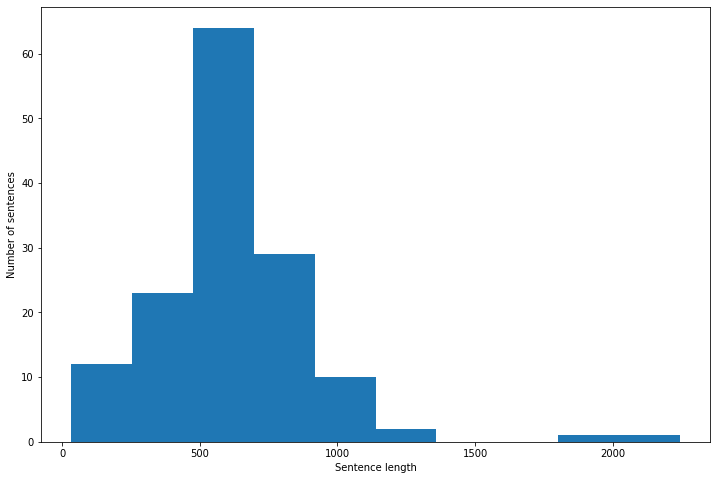

In [12]:
fig = plt.figure(figsize=(12, 8)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [13]:
data = data.sort_values('year')
data.head(10)

,name,lyrics,album,year,album_name,pre-processed_lyrics,tokens,Word Counts,Unique Word Counts
121,Blow Them Horns,bear witness watch me get it in like underage...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,[Verse 1: Kendrick Lamar]\nBear witness\nWatch...,"[bear, witness, watch, me, get, it, in, like, ...",635,304
130,Man of the Hour,blewell jeans moby dick stitching trigger fin...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,"[Verse 1]\nBlewell jeans, Moby Dick stitching\...","[blewell, jeans, moby, dick, stitching, trigge...",183,122
127,Prototype,they say that im the one and you you are the ...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,[Hook: Kendrick Lamar]\nThey say that I'm the ...,"[they, say, that, im, the, one, and, you, you,...",590,283
124,Hard Body,oh shit awwwww you motherfucker the next one ...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,"[Intro]\nThat’s where you headed boy, to pine ...","[oh, shit, awwwww, you, motherfucker, the, nex...",657,287
126,Gz and Hustlas,what i look like a sucker to you nigga fuck y...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,"[Intro: Kendrick Lamar]\nWhat I look like, a s...","[what, i, look, like, a, sucker, to, you, nigg...",644,315
131,Get Throwed,you know im surgical with this bitch jake how...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,[Skit]\nYou know I'm surgical with this bitch ...,"[you, know, im, surgical, with, this, bitch, j...",555,289
128,Hpnotiq,10 9 8 7 6 5 4 3 2 1 i kick a funky friendly ...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,"[Intro]\n\n10,9,8\n7,6,5\n4,3,2\n1\n\n[Verse 1...","[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, i, kick, a, fu...",322,193
109,Imagine,i sit on the studio couch ask myself what the...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,[Verse 1: K. Dot]\nI sit on the studio couch\n...,"[i, sit, on, the, studio, couch, ask, myself, ...",668,337
136,Interview with DJ Dave Part 1,man how long you been how long you been rappi...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,"[DJ Dave]\nMan, how long you been, how long yo...","[man, how, long, you, been, how, long, you, be...",33,25
110,Blame God,been ready jay i been ready hov i been ready ...,"{'api_path': '/albums/19282', 'cover_art_url':...",2005,Training Day,"[Intro: Kendrick Lamar]\nBeen ready\nJay, I be...","[been, ready, jay, i, been, ready, hov, i, bee...",610,289


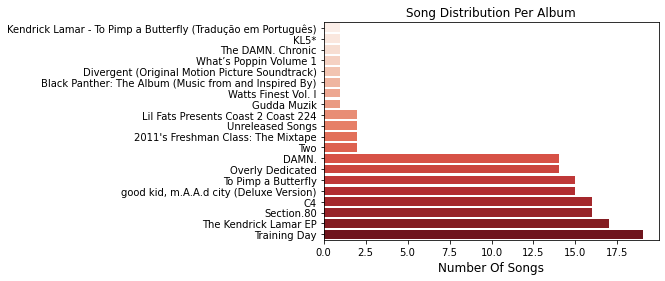

In [14]:
sns.countplot(y=data['album_name'].values, order=data['album_name'].value_counts(ascending=True).index, palette='Reds')
plt.title('Song Distribution Per Album')
plt.xlabel('Number Of Songs', fontsize=12)
plt.show()

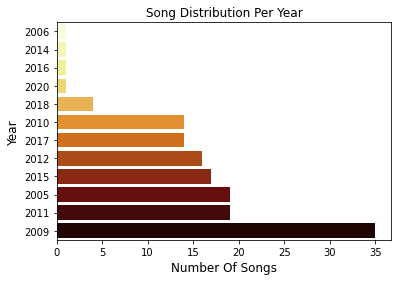

In [15]:
sns.countplot(y=data['year'].values, order=data['year'].value_counts(ascending=True).index, palette='afmhot_r')
plt.title('Song Distribution Per Year')
plt.ylabel('Year', fontsize=12)
plt.xlabel('Number Of Songs', fontsize=12)
plt.show()

In [17]:
#Import spaCy and load the language library
import spacy
print(spacy.__version__)
nlp = spacy.load('en_core_web_lg') 

3.0.6


In [18]:
from spacy import displacy
from IPython.core.display import display, HTML

In [19]:
# add data from csv file
lyrics_path = "/content/drive/MyDrive/IRTM/kendrick_lamar_lyrics.csv"

In [20]:
# load the data
data = pd.read_csv(lyrics_path)
data.head(10)

,name,lyrics,album,year,album_name,pre-processed_lyrics
0,HUMBLE.,nobody pray for me it been that day for me wa...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017-03-30,DAMN.,[Intro]\nNobody pray for me\nIt been that day ...
1,​m.A.A.d city,if pirus and crips all got along theyd probab...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012-10-22,"good kid, m.A.A.d city (Deluxe Version)",[Part I: Produced by Sounwave]\n[Intro: Kendri...
2,Swimming Pools (Drank),pour up pass out now i done grew up round som...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012-07-31,"good kid, m.A.A.d city (Deluxe Version)",[Produced by T-Minus]\n[Intro]\nPour up (Drank...
3,DNA.,i got i got i got i got loyalty got royalty i...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017-04-14,DAMN.,"[Verse 1]\nI got, I got, I got, I got—\nLoyalt..."
4,Money Trees,uh me and my niggas tryna get it ya bish home...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012-10-22,"good kid, m.A.A.d city (Deluxe Version)",[Produced by DJ Dahi]\n[Verse 1: Kendrick Lama...
5,XXX.,america god bless you if its good to ya ameri...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017-04-14,DAMN.,[Intro: Bēkon & Kid Capri]\nAmerica\nGod bless...
6,"Bitch, Don’t Kill My Vibe",i am a sinner whos probably gonna sin again l...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012-10-22,"good kid, m.A.A.d city (Deluxe Version)",[Produced by Sounwave]\n[Chorus: Kendrick Lama...
7,Poetic Justice,every second every minute man i swear that sh...,"{'api_path': '/albums/491200', 'cover_art_url'...",2012-10-22,"good kid, m.A.A.d city (Deluxe Version)",[Produced by Scoop DeVille & Sounwave]\n[Intro...
8,King Kunta,i got a bone to pick i dont want you monkey m...,"{'api_path': '/albums/120991', 'cover_art_url'...",2015-03-15,To Pimp a Butterfly,[Produced by Sounwave; Additional production b...
9,LOVE.,damn love or lust damn all of us give me a ru...,"{'api_path': '/albums/337082', 'cover_art_url'...",2017-04-14,DAMN.,"[Intro: Kendrick Lamar]\nDamn, love or lust\nD..."


In [21]:
data_lyrics = data['lyrics']
lyrics_token = ''
for i in data['lyrics']:
    lyrics_token += str(i)

In [22]:
doc = nlp(lyrics_token)
# print([(X.text) for X in doc.ents if X.label_ == "LOC"])
print([(X.text, X.label_) for X in doc.ents])

[('richard pryor', 'PERSON'), ('first', 'ORDINAL'), ('that day', 'DATE'), ('nine', 'CARDINAL'), ('four', 'CARDINAL'), ('94', 'CARDINAL'), ('two', 'CARDINAL'), ('a month', 'DATE'), ('third', 'ORDINAL'), ('first', 'ORDINAL'), ('the next weekend', 'DATE'), ('kendrick', 'PERSON'), ('one', 'CARDINAL'), ('ten', 'CARDINAL'), ('kendrick', 'PERSON'), ('usa', 'GPE'), ('the minute', 'TIME'), ('only two', 'CARDINAL'), ('three', 'CARDINAL'), ('first', 'ORDINAL'), ('kendrick', 'PERSON'), ('kendrick', 'PERSON'), ('kendrick', 'PERSON'), ('only two', 'CARDINAL'), ('three', 'CARDINAL'), ('first', 'ORDINAL'), ('one hundred', 'CARDINAL'), ('two', 'CARDINAL'), ('two hundred', 'CARDINAL'), ('one hundred', 'CARDINAL'), ('two', 'CARDINAL'), ('two hundred', 'CARDINAL'), ('only two', 'CARDINAL'), ('three', 'CARDINAL'), ('first', 'ORDINAL'), ('quarter', 'CARDINAL'), ('second', 'ORDINAL'), ('9', 'CARDINAL'), ('29', 'CARDINAL'), ('african americans', 'NORP'), ('recent years', 'DATE'), ('four', 'CARDINAL'), ('monda

In [23]:
html = displacy.render(doc, style="ent")
display(HTML(html))

In [24]:
from collections import Counter

In [25]:
labels = [x.label_ for x in doc.ents]
Counter(labels)

Counter({'CARDINAL': 722,
         'DATE': 353,
         'GPE': 52,
         'LAW': 1,
         'LOC': 1,
         'MONEY': 15,
         'NORP': 25,
         'ORDINAL': 137,
         'ORG': 21,
         'PERCENT': 9,
         'PERSON': 302,
         'PRODUCT': 13,
         'QUANTITY': 63,
         'TIME': 137})

In [26]:
!pip install geopandas
!pip install geopy
!pip install folium

     |████████████████████████████████| 1.0MB 5.5MB/s 
     |████████████████████████████████| 6.6MB 22.7MB/s 
     |████████████████████████████████| 15.3MB 262kB/s 


In [28]:
locations = []
locations.extend([[ent.text, ent.start, ent.end] for ent in doc.ents if ent.label_ in ['LOC']])
locations.extend([[ent.text, ent.start, ent.end] for ent in doc.ents if ent.label_ in ['GPE']])
loc_df = pd.DataFrame(locations, columns=['Location', 'start','end'])
loc_df.head()

,Location,start,end
0,africa,22213,22214
1,usa,1436,1437
2,georgia,9132,9133
3,cuba,11651,11652
4,israel,14221,14222


In [29]:
import pandas as pd 
import geopandas as gpd 
import geopy 
import matplotlib.pyplot as plt
from geopy.extra.rate_limiter import RateLimiter
locator = geopy.geocoders.Nominatim(user_agent='mygeocoder')
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
loc_df['address'] = loc_df['Location'].apply(geocode)

In [30]:
loc_df['coordinates'] = loc_df['address'].apply(lambda loc: tuple(loc.point) if loc else None)
loc_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(loc_df['coordinates'].tolist(), index=loc_df.index)
loc_df.latitude.isnull().sum()
loc_df = loc_df[pd.notnull(loc_df['latitude'])]

In [31]:
import folium
from folium.plugins import FastMarkerCluster
folium_map = folium.Map(location=[59.338315,18.089960],
 zoom_start=2,
 tiles='CartoDB dark_matter')
FastMarkerCluster(data=list(zip(loc_df['latitude'].values, loc_df['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map